### **Weather Forecast challenge**

#### **Project Overview :**

#### **Data Information :**


 1. **Date** : Varchar : Describes the Weather date.    
 2. **temperature** : Double : Describes the Temperature.
 3. **Average humidity** : Double (%) : Describes the Avg Humidity.
 4. **Average dewpoint** : Double (F) : Describes the Avg Dewpoint. 
 5. **Average barometer** : Double : Describes the Avg Barometer.
 6. **Average windspeed** : Double (mph) : Describes the Avg windspeed.
 7. **Average gustspeed** : Double (mph) : Describes the Avg gustspeed.
 8. **Rainfall for month** : Double : Describes the Rainfall_Month.
 9. **Rainfall for year** : Double : Describes the Rainfall_year.
 10. **Maximum rain per minute** : Double : Describes the Max_Rainfall_per_Min.
 11. **Maximum temperature** : Double (F) : Describes the Max Temperature.
 12. **Minimum temperature** : Double (F) : Describes the Min Temperature.
 13. **Maximum humidity** : Double (%) : Describes the Max Humidity.
 14. **Minimum humidity** : Double (%) : Describes the Min Humidity.
 15. **Maximum pressure** : Double : Describes the Max pressure.
 16. **Minimum pressure** : Double : Describes the Min pressure.
 17. **Maximum windspeed** : Double (mph) : Describes the Max widspeed.
 18. **Maximum gust speed** : Double (mph) : Describes the Max Gust speed.
 19. **Maximum heat index** : Double (F) : Describes the Avg Heat Index.
 20. **Date1** : Varchar : Describes the date.
 21. **Month** : Int : Describes the Month.
 22. **diff_pressure** : Double : Describes the Difference_pressure.

In [ ]:
# Data set - Drive 

#Google Drive Connectivity - Uploading the dataset file from the drive

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/Weather_project/"

###Subtask 1: Correct years for given data set

In [ ]:
def replace_quotes(string):
  string = str(string)
  return string.replace("'", "")

def float_type(string):
  return round(string,3)

def extract_date_parts(date_string): # Function to extract the date 
    date_parts = date_string.split("-")
    return pd.Series({'year': date_parts[0],'month' : date_parts[1] ,'day': date_parts[2]})


def year_cal(df): # Function to increment the year based on the conditions
  c=0
  for i in range(len(df)-2):
    if (df.loc[i,'month']>df.loc[i+1,'month']):
      c = c+1
      df.loc[i+1,'year'] = df.loc[i-1,'year']+c
 
  for i in range(len(df)-1):
    if df.loc[i,'year'] > df.loc[i+1,'year']:
      df.loc[i+1,'year'] = df.loc[i,'year']
      
  return df


def date_for(row): # Function to covert the data into a date format
    
    year = row['year']
    month = row['month']
    day = row['day']


    if (calendar.isleap(year)):
        date = ((pd.to_datetime(f"{year}-{month}-{day}")).date().strftime('%Y-%m-%d'))

    elif month == 2 and day == 29:
      
        date = np.nan
    else:
        date = ((pd.to_datetime(f"{year}-{month}-{day}")).date().strftime('%Y-%m-%d'))
    return (date)



####Subtask 2: removal of duplicate rows and duplicate Columns


In [ ]:
def Weather_QC(df):
  df = df.filter(regex='^(?!Unnamed: )', axis=1) # Filter the col with Unnamed value
  df.dropna(how='all', inplace=True)
  df = df.drop(df.columns[10:11], axis=1)
  df = df.drop(df.columns[-3:-1], axis=1) # Drop Date1 , month (Not required)


  #column_index_list = df.columns.tolist()

  for i in df.columns.tolist():
    df[i] = df[i].apply(replace_quotes)

  for i in df.columns.tolist()[1:]:
    df[i] = (df[i].apply(pd.to_numeric, errors='coerce')).apply(float_type)


  df[['year','month', 'day']] = df['Date'].apply(extract_date_parts)

  #col_list = df.columns.tolist()
  #int_index_list = col_list[-3:]
  
  for i in df.columns.tolist()[-3:]:
    df[i] = (df[i].apply(pd.to_numeric, errors='coerce'))
  
  
  df = year_cal(df)    
  print("-"*10)
  df['New_Date'] = df.apply(date_for, axis=1)

  df.dropna(subset=["New_Date"], inplace=True)
  #display(df)
  df.drop_duplicates(subset=["New_Date"], inplace=True)

  return df



#### Main Method 

In [ ]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime

df = pd.read_csv(path+"weather_dataset_stage1.csv")

df_update = Weather_QC(df) 

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


----------


In [ ]:
# Rephrase the header values
df_update = df_update.rename(columns={ 
    'Date':' Old_Date ', 
    ' Temperature':' Avg Temperature °F ',
    ' Average humidity (%': ' Avg humidity %',
    ' Average dewpoint (°F': ' Avg dewpoint °F', 
    ' Average barometer (in':' Avg barometer in', 
    ' Average windspeed (mph': ' Avg windspeed mph',
    ' Average gustspeed (mph': ' Avg gustspeed mph',
    ' Average direction (°deg': ' Avg direction °deg',
    ' Rainfall for month (in': ' Rainfall_Month in',
     'Rainfall for year (in': 'Rainfall_Year in',
    ' Maximum temperature (°F':' Max Temperature °F', 
    ' Minimum temperature (°F':' Min Temperature °F', 
    ' Maximum humidity (%':' Max Humidity %', 
    ' Minimum humidity (%':' Min Humidity %', 
    ' Maximum pressure' :' Max pressure', 
    ' Minimum pressure':' Min pressure',
    ' Maximum windspeed (mph': ' Max windspeed mph',
    ' Maximum gust speed (mph': ' Max gust speed mph', 
    ' Maximum heat index (°F' :' Max heat index °F', 
    ' diff_pressure':' Diff_pressure'})

In [ ]:
# convert the column names to strings
df_update['New_Date'] = df_update['New_Date'].astype(str)

In [ ]:
print(df_update.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 3901
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    Old_Date             3900 non-null   object 
 1    Avg Temperature °F   3900 non-null   float64
 2    Avg humidity %       3900 non-null   float64
 3    Avg dewpoint °F      3900 non-null   float64
 4    Avg barometer in     3900 non-null   float64
 5    Avg windspeed mph    3900 non-null   float64
 6    Avg gustspeed mph    3900 non-null   float64
 7    Avg direction °deg   3900 non-null   float64
 8    Rainfall_Month in    3900 non-null   float64
 9   Rainfall_Year in      3900 non-null   float64
 10   Max Temperature °F   3900 non-null   float64
 11   Min Temperature °F   3900 non-null   float64
 12   Max Humidity %       3900 non-null   float64
 13   Min Humidity %       3900 non-null   float64
 14   Max pressure         3900 non-null   float64
 15   Min pressure        

In [ ]:
df_update.isna().sum()

 Old_Date               0
 Avg Temperature °F     0
 Avg humidity %         0
 Avg dewpoint °F        0
 Avg barometer in       0
 Avg windspeed mph      0
 Avg gustspeed mph      0
 Avg direction °deg     0
 Rainfall_Month in      0
Rainfall_Year in        0
 Max Temperature °F     0
 Min Temperature °F     0
 Max Humidity %         0
 Min Humidity %         0
 Max pressure           0
 Min pressure           0
 Max windspeed mph      0
 Max gust speed mph     0
 Max heat index °F      0
 Diff_pressure          1
year                    0
month                   0
day                     0
New_Date                0
dtype: int64

In [ ]:
# Count the number of zeros in each column
zeros = (df_update == 0).astype(int).sum(axis=0)

# Print the results
print(zeros)

 Old_Date                 0
 Avg Temperature °F       0
 Avg humidity %           0
 Avg dewpoint °F          3
 Avg barometer in         0
 Avg windspeed mph       56
 Avg gustspeed mph       55
 Avg direction °deg      20
 Rainfall_Month in      549
Rainfall_Year in        117
 Max Temperature °F       1
 Min Temperature °F       4
 Max Humidity %           0
 Min Humidity %           5
 Max pressure             0
 Min pressure             0
 Max windspeed mph       54
 Max gust speed mph      50
 Max heat index °F        1
 Diff_pressure            2
year                      0
month                     0
day                       0
New_Date                  0
dtype: int64


In [ ]:
df_update = df_update.reset_index(drop = True)

In [ ]:
from google.colab import files
df_update.to_csv(path+'Final_Weather.csv', encoding = 'utf-8') 

In [ ]:
df = pd.read_csv(path+"Final_Weather.csv")

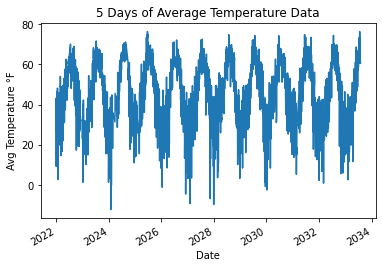

In [ ]:
import matplotlib.pyplot as plt
# create a sample DataFrame with average temperature data
#data = {df['New_date'],df[' Avg Temperature °F ']}
#df = pd.DataFrame(data)

# set the 'Date' column as the index of the DataFrame
df.set_index('New_Date', inplace=True)

# convert the 'Date' index to a datetime type
df.index = pd.to_datetime(df.index)

# plot the average temperature data as a line plot
plt.plot(df.index, df[' Avg Temperature °F '])

# set the x-axis to show dates instead of numerical values
plt.gcf().autofmt_xdate()

# add labels and title to the plot
plt.xlabel('Date')
plt.ylabel(' Avg Temperature °F ')
plt.title('5 Days of Average Temperature Data')

# show the plot
plt.show()

### Subtask 3: Fix few labels for the dataset

In [ ]:
# Normalizing the value based on the month , labels are created 
#-----------#---------------#-------------#----------------#
def min_max_scaling(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        grouped = df.groupby([df['New_Date'].dt.year, df['New_Date'].dt.month])
        normalized = pd.DataFrame()
        for name, group in grouped:
            year, month = name
            min_value = group[col].min()
            max_value = group[col].max()
            group[col] = (group[col] - min_value) / (max_value - min_value)
            group[col] = group[col].round(3)
            group['Year'] = year
            group['Month'] = month
            normalized = pd.concat([normalized, group])
        df[f'Normalized_{col}'] = normalized[col]
    return df

def bin_data(col): # there are 3 bin , need to update the bins 
    bins = [-np.inf, 1/2, np.inf]
    labels = ["Low", "High"]
    return pd.cut(col, bins, labels=labels, right=False)


# Load your data into a pandas dataframe
df = pd.read_csv(path+'Final_Weather.csv')
df = df.drop(df.columns[0:2], axis=1)
df['New_Date'] = pd.to_datetime(df['New_Date'])

# Perform Min-Max scaling on all numerical columns
df = min_max_scaling(df)

numerical_cols = df.select_dtypes(include=[np.number]).columns

# Filter the columns that start with "Nor"
filtered_cols = [col for col in numerical_cols if col.startswith("Normalized_")]

# Bin the data for each filtered column
for col in filtered_cols:
    df[f'{col}_Labels'] = bin_data(df[col])

### Questions

In [ ]:
df = pd.read_csv(path+"Final_Weather.csv")

In [ ]:
# convert the date column to a datetime object
df['New_Date'] = pd.to_datetime(df['New_Date'])

# set the date column as the index of the DataFrame
df = df.set_index('New_Date')

# group the data by month
monthly_data = df.groupby(pd.Grouper(freq='M'))

### 1. Give the count of the minimum number of days for the time when temperature reduced


In [ ]:
# Global Minima - The Lowest temp in the month is calculated 
#--------------#----------------#-------------#---------#
# group the data by month
monthly_data = df.groupby(pd.Grouper(freq='M'))

# Iterate over the monthly data and count the number of global minima
for name, group in monthly_data:
  if not group.empty:
        temperatures = group[' Avg Temperature °F '].values
        global_minima = np.argmin(temperatures)
        print(f"In {name.month}/{name.year}, the temperature had a global minimum on {group.index[global_minima].strftime('%Y-%m-%d')}")
        print(f"The temperature at the global minimum was: {temperatures[global_minima]}")

In 1/2022, the temperature had a global minimum on 2022-01-26
The temperature at the global minimum was: 2.8
In 2/2022, the temperature had a global minimum on 2022-02-13
The temperature at the global minimum was: 19.9
In 3/2022, the temperature had a global minimum on 2022-03-12
The temperature at the global minimum was: 14.7
In 4/2022, the temperature had a global minimum on 2022-04-05
The temperature at the global minimum was: 22.0
In 5/2022, the temperature had a global minimum on 2022-05-01
The temperature at the global minimum was: 37.2
In 6/2022, the temperature had a global minimum on 2022-06-02
The temperature at the global minimum was: 42.2
In 7/2022, the temperature had a global minimum on 2022-07-30
The temperature at the global minimum was: 48.1
In 8/2022, the temperature had a global minimum on 2022-08-17
The temperature at the global minimum was: 51.7
In 9/2022, the temperature had a global minimum on 2022-09-22
The temperature at the global minimum was: 39.4
In 10/2022,

In [ ]:
# Local Minima - The Lowest temp in the month is calculated 
#-------------#-----------------#------------#-----------#
# Give the count of the minimum number of days for the time when temperature reduced 
# -> for every temperature difference  


# iterate over the monthly data and count the number of local minima
for name, group in monthly_data:
    temperatures = group[' Avg Temperature °F '].values
    local_minima = (np.diff(np.sign(np.diff(temperatures))) > 0).nonzero()[0] + 1
    num_reductions = len(local_minima)
    print(f"In {name.month}/{name.year}, the temperature reduced {num_reductions} times.")
    if num_reductions > 0:
        dates = group.iloc[local_minima].index
        temperatures_at_minima = temperatures[local_minima]
        print(f"The temperature was reduced on the following dates: {dates.strftime('%Y-%m-%d').tolist()}")
        print(f"The temperature at the minimum was: {temperatures_at_minima.tolist()}")

In 1/2022, the temperature reduced 7 times.
The temperature was reduced on the following dates: ['2022-01-04', '2022-01-10', '2022-01-12', '2022-01-17', '2022-01-20', '2022-01-23', '2022-01-26']
The temperature at the minimum was: [9.3, 26.2, 23.4, 40.9, 40.0, 24.8, 2.8]
In 2/2022, the temperature reduced 6 times.
The temperature was reduced on the following dates: ['2022-02-06', '2022-02-11', '2022-02-13', '2022-02-19', '2022-02-24', '2022-02-27']
The temperature at the minimum was: [33.4, 23.2, 19.9, 27.8, 44.4, 26.7]
In 3/2022, the temperature reduced 7 times.
The temperature was reduced on the following dates: ['2022-03-03', '2022-03-07', '2022-03-10', '2022-03-12', '2022-03-19', '2022-03-26', '2022-03-30']
The temperature at the minimum was: [48.7, 27.8, 19.5, 14.7, 40.2, 16.8, 23.3]
In 4/2022, the temperature reduced 7 times.
The temperature was reduced on the following dates: ['2022-04-05', '2022-04-12', '2022-04-14', '2022-04-17', '2022-04-22', '2022-04-25', '2022-04-27']
The t

### 2. Find the temperature as Cold / hot by using the case and avg of values of the given data set


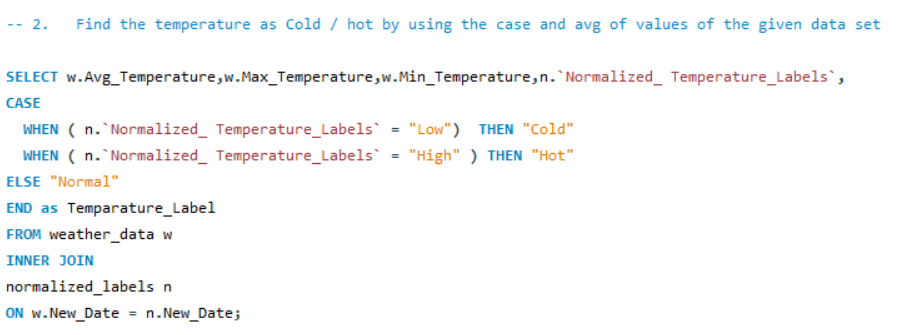

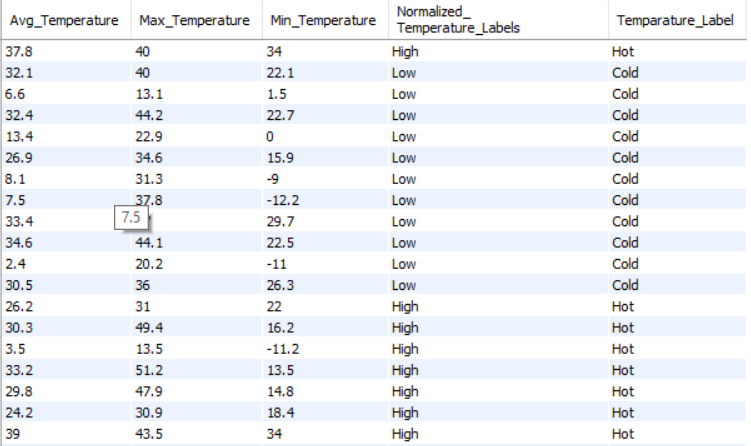

### 3. Can you check for all 4 consecutive days when the temperature was below 30 Fahrenheit

In [ ]:
# Temperature drop in 4 consecutive days below 30 F 
#----------#---------#---------#
total_drops = 0
for name, group in monthly_data:
    temperatures = group[group[' Avg Temperature °F ']< 30][' Avg Temperature °F '].values
    diff = np.diff(temperatures)
    max_consecutive_drops = 0
    current_consecutive_drops = 0
    for i in range(len(diff)):
        if diff[i] < 0:
            current_consecutive_drops += 1
        else:
            if current_consecutive_drops >= 4:
                max_consecutive_drops += 1
            current_consecutive_drops = 0
    total_drops +=  max_consecutive_drops
    print(f"In {name.month}/{name.year}, 4 consecutive days temp 30 F , count :{max_consecutive_drops} ")
print(f"Total Counts occured  : {total_drops}" )

In 1/2022, 4 consecutive days temp 30 F , count :0 
In 2/2022, 4 consecutive days temp 30 F , count :0 
In 3/2022, 4 consecutive days temp 30 F , count :0 
In 4/2022, 4 consecutive days temp 30 F , count :0 
In 5/2022, 4 consecutive days temp 30 F , count :0 
In 6/2022, 4 consecutive days temp 30 F , count :0 
In 7/2022, 4 consecutive days temp 30 F , count :0 
In 8/2022, 4 consecutive days temp 30 F , count :0 
In 9/2022, 4 consecutive days temp 30 F , count :0 
In 10/2022, 4 consecutive days temp 30 F , count :0 
In 11/2022, 4 consecutive days temp 30 F , count :0 
In 12/2022, 4 consecutive days temp 30 F , count :0 
In 1/2023, 4 consecutive days temp 30 F , count :0 
In 2/2023, 4 consecutive days temp 30 F , count :0 
In 3/2023, 4 consecutive days temp 30 F , count :0 
In 4/2023, 4 consecutive days temp 30 F , count :0 
In 5/2023, 4 consecutive days temp 30 F , count :0 
In 6/2023, 4 consecutive days temp 30 F , count :0 
In 7/2023, 4 consecutive days temp 30 F , count :0 
In 8/2023

### 4.Can you find the maximum number of days for which temperature dropped

In [ ]:
# Max Temperature drop consecutive days 
#----------#---------#---------#

for name, group in monthly_data:
    temperatures = group[' Avg Temperature °F '].values
    diff = np.diff(temperatures)
    max_consecutive_drops = 0
    current_consecutive_drops = 0
    for i in range(len(diff)):
        if diff[i] < 0:
            current_consecutive_drops += 1
        else:
            if current_consecutive_drops > max_consecutive_drops:
                max_consecutive_drops = current_consecutive_drops
            current_consecutive_drops = 0
    print(f"In {name.month}/{name.year}, the temperature dropped for a maximum of {max_consecutive_drops} days.")

In 1/2022, the temperature dropped for a maximum of 2 days.
In 2/2022, the temperature dropped for a maximum of 4 days.
In 3/2022, the temperature dropped for a maximum of 4 days.
In 4/2022, the temperature dropped for a maximum of 4 days.
In 5/2022, the temperature dropped for a maximum of 3 days.
In 6/2022, the temperature dropped for a maximum of 2 days.
In 7/2022, the temperature dropped for a maximum of 4 days.
In 8/2022, the temperature dropped for a maximum of 5 days.
In 9/2022, the temperature dropped for a maximum of 4 days.
In 10/2022, the temperature dropped for a maximum of 3 days.
In 11/2022, the temperature dropped for a maximum of 4 days.
In 12/2022, the temperature dropped for a maximum of 0 days.
In 1/2023, the temperature dropped for a maximum of 4 days.
In 2/2023, the temperature dropped for a maximum of 4 days.
In 3/2023, the temperature dropped for a maximum of 3 days.
In 4/2023, the temperature dropped for a maximum of 3 days.
In 5/2023, the temperature dropped fo

### 5.Can you find the average of average humidity from the dataset 



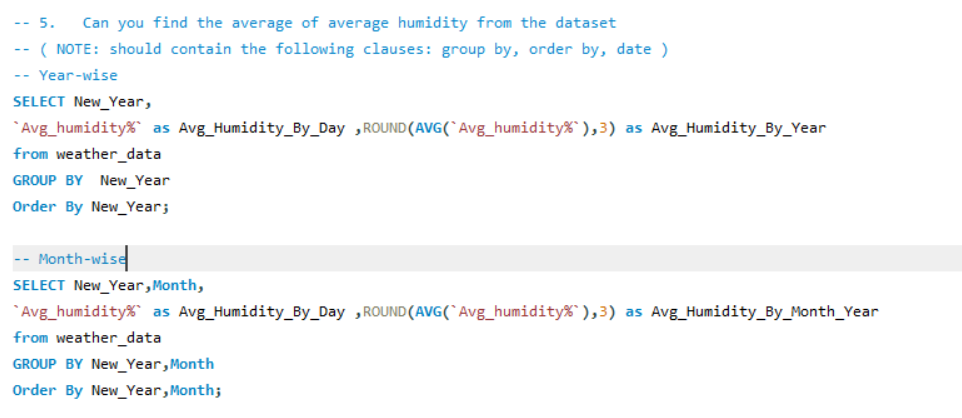

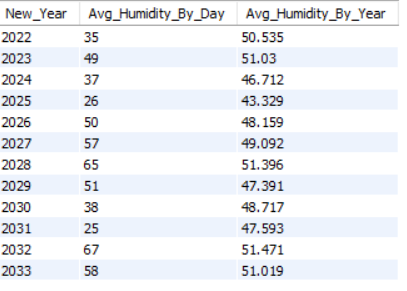

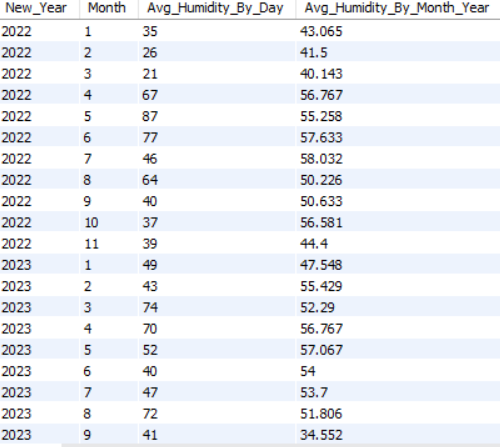

### 6. Use the GROUP BY clause on the Date column and make a query to fetch details for average windspeed ( which is now windspeed done in task 3 )


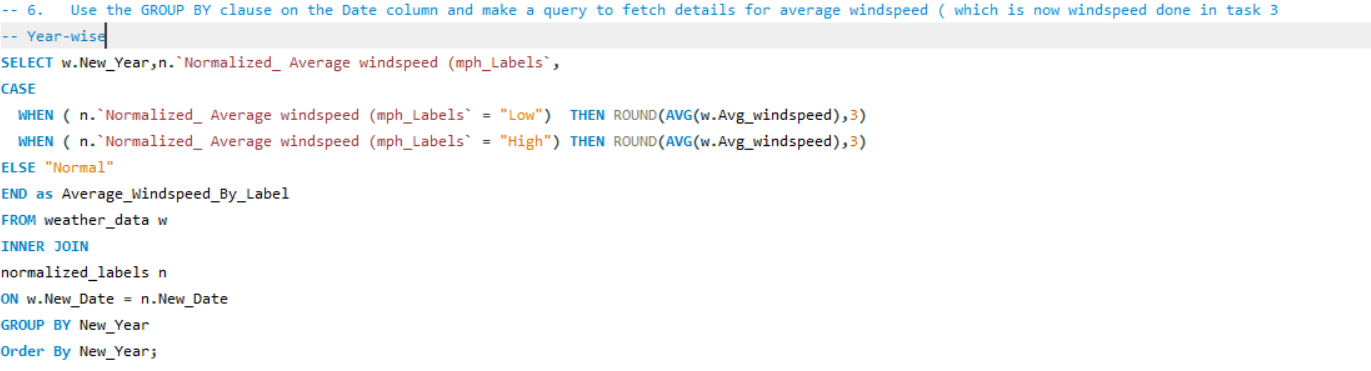

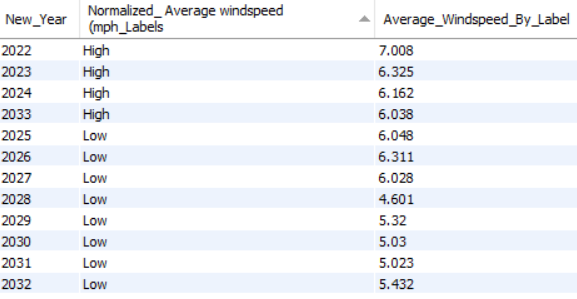

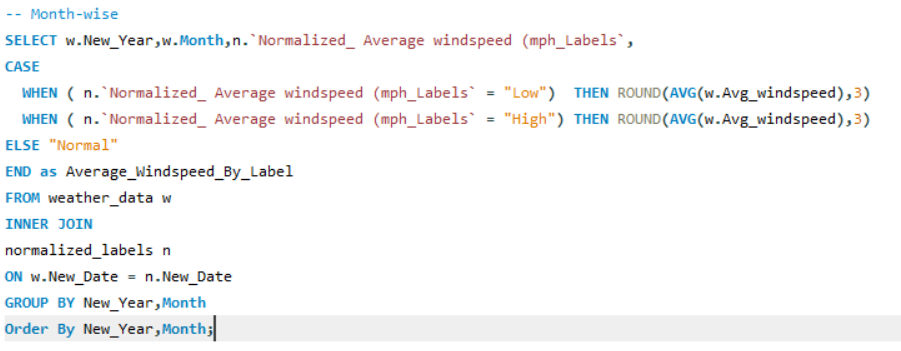

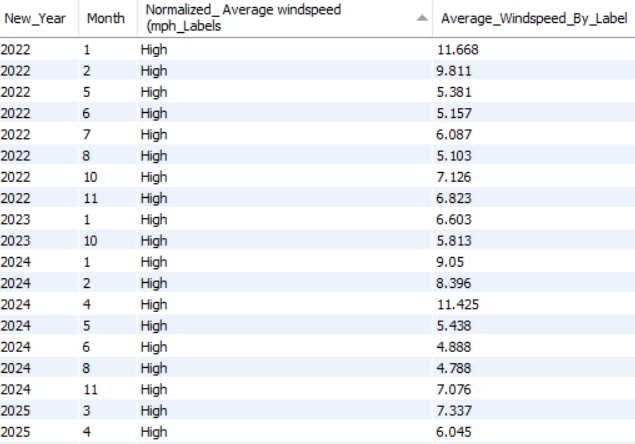

In [ ]:
df.to_csv(path+"normalized_dataset_labeled.csv",index =False)

### 7. Please add the data in the dataset for 2034 and 2035 as well as forecast predictions for these years 


In [ ]:
# Load the data set
data = pd.read_csv(path+"normalized_dataset_labeled.csv")

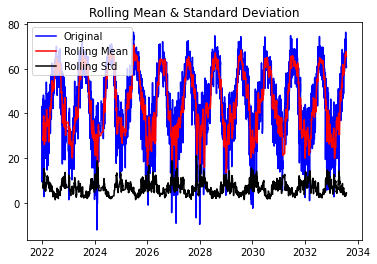

ADF Statistic: -4.523494789795546
p-value: 0.0001782861609955019
Critical Values:
	1%: -3.4320343310124954
	5%: -2.8622842451700223
	10%: -2.5671661706659776
                                SARIMAX Results                                 
Dep. Variable:      Avg Temperature °F    No. Observations:                 3120
Model:                   ARIMA(1, 1, 1)   Log Likelihood              -10365.381
Date:                  Mon, 13 Feb 2023   AIC                          20736.762
Time:                          01:22:21   BIC                          20754.898
Sample:                               0   HQIC                         20743.272
                                 - 3120                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6316      0.018    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

data['New_Date'] = pd.to_datetime(data['New_Date'])
data.set_index('New_Date', inplace=True)

# Check for stationarity of the data
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Plot ACF and PACF
def plot_acf_pacf(data):
    plot_acf(data,bartlett_confint=True, lags=40)
    plt.show()
    plot_pacf(data, lags=40)
    plt.show()

# Fit ARIMA model
def fit_arima(data):
    # Fit ARIMA model
    train_data = df[' Avg Temperature °F '][:int(len(data)*0.8)]
    test_data = df[' Avg Temperature °F '][int(len(data)*0.8):]
    model1 = ARIMA(train_data, order=(1,1,1))
    model2 = ARIMA(train_data, order=(2,1,2))
    model3 = ARIMA(train_data, order=(3,1,3))

    # Fit the models to the data
    model1_fit = model1.fit()
    model2_fit = model2.fit()
    model3_fit = model3.fit()

    print(model1_fit.summary())
    print(model2_fit.summary())
    print(model3_fit.summary())

    # Make predictions on the test data
    prediction1 = model1_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')
    prediction2 = model2_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')
    prediction3 = model3_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')

    # Calculate the mean squared error between the predicted and actual values
    mse1 = mean_squared_error(test_data, prediction1)
    mse2 = mean_squared_error(test_data, prediction2)
    mse3 = mean_squared_error(test_data, prediction3)

    print('Mean Squared Error: ', mse1)
    print('Mean Squared Error: ', mse2)
    print('Mean Squared Error: ', mse3)

    return model1_fit,model2_fit,model3_fit

# Forecast future values
def forecast(model1_fit,model2_fit,model3_fit, num_steps):

    forecast1 = model1_fit.forecast(steps=num_steps)
    forecast2 = model2_fit.forecast(steps=num_steps)
    forecast3 = model3_fit.forecast(steps=num_steps)
    return forecast1,forecast2,forecast3

# Main function to forecast
def main(data, num_steps):
    # Check stationarity of the data
    test_stationarity(data)
    # Plot ACF and PACF
    #plot_acf_pacf(data)
    # Get best ARIMA model fit
    model_fit1,model_fit2,model_fit3 = fit_arima(data)
    # Forecast future values
    forecast1,forecast2,forecast3 = forecast(model_fit1,model_fit2,model_fit3, num_steps)
    return forecast1,forecast2,forecast3

# Forecast for next 2 years
num_steps = 365*2
forecast_val1,forecast_val2,forecast_val3 = main(data[' Avg Temperature °F '], num_steps)
forcast_data = pd.DataFrame()
forcast_data['v1']=forecast_val1.to_list()
forcast_data['v2']=forecast_val2.to_list()
forcast_data['v3']=forecast_val3.to_list()

In [ ]:
forcast_data.to_csv(path+"fap.csv")

### 8. If the maximum gust speed increases from 55mph, fetch the details for the next 4 days


In [ ]:
# Find the rows where the maximum gust speed is greater than 55mph
mask = df[' Max gust speed mph'] > 55

# Filter the dataframe to only include the rows where the maximum gust speed is greater than 55mph
filtered_df = df[mask]

# Loop through each row that meets the condition
for index, row in filtered_df.iterrows():
    # Find the index of the current row
    current_index = row.name
    # Select the next 4 days from the filtered dataframe
    next_4_days = df.iloc[current_index:current_index + 4]
    # Print the results
    print("Date: ", row['New_Date'], "Speed: ", row[' Max gust speed mph'], "Dates: ", end="")
    for next_day_index, next_day_row in next_4_days.iterrows():
        print(next_day_row['New_Date'], end=", ")
    print("\n")

Date:  2022-01-01 Speed:  59.0 Dates: 2022-01-01, 2022-01-02, 2022-01-03, 2022-01-04, 

Date:  2022-01-28 Speed:  58.0 Dates: 2022-01-28, 2022-01-29, 2022-01-30, 2022-01-31, 

Date:  2022-05-17 Speed:  255.0 Dates: 2022-05-17, 2022-05-18, 2022-05-19, 2022-05-20, 

Date:  2022-05-18 Speed:  255.0 Dates: 2022-05-18, 2022-05-19, 2022-05-20, 2022-05-21, 

Date:  2022-05-19 Speed:  255.0 Dates: 2022-05-19, 2022-05-20, 2022-05-21, 2022-05-22, 

Date:  2022-05-20 Speed:  255.0 Dates: 2022-05-20, 2022-05-21, 2022-05-22, 2022-05-23, 

Date:  2022-05-21 Speed:  255.0 Dates: 2022-05-21, 2022-05-22, 2022-05-23, 2022-05-24, 

Date:  2022-05-22 Speed:  255.0 Dates: 2022-05-22, 2022-05-23, 2022-05-24, 2022-05-25, 

Date:  2022-05-27 Speed:  74.0 Dates: 2022-05-27, 2022-05-28, 2022-05-29, 2022-05-30, 

Date:  2022-08-07 Speed:  255.0 Dates: 2022-08-07, 2022-08-08, 2022-08-09, 2022-08-10, 

Date:  2022-08-08 Speed:  255.0 Dates: 2022-08-08, 2022-08-09, 2022-08-10, 2022-08-11, 

Date:  2022-09-01 Speed:

### 9.Find the number of days when the temperature went below 0 degrees Celsius 

In [ ]:
#function to find temperatures below 0 degree celcius 
def temp_below_zero(df):
  consecDays = pd.DataFrame() 
  dfTmp = [] 
  dfDates = [] 
  tmp = 0 

  for i in df[' Avg Temperature °F ']:  
  #converting temperature from farenheit to celcius 
    c = (i - 32)/1.8 #checking the temperatures below 0 degree celcius 

    if c<0: 
      dfTmp.append(c) #finding the dates corresponding to that temperatues 
      j=df.index[df[' Avg Temperature °F ']==i] 
      dfDates.append(df['New_Date'][j]) 
      tmp+=1 
  return dfTmp,dfDates,tmp    #calling the function temp_below_zero t,d, 

count,t,d=temp_below_zero(df ) 

print("No.of temperatures below 0 degree celcius:") 
print(count) 
print("Temperatures in celcius ") 
print(t)
print("Dates corresponding to the temperatues") 
print(d)

No.of temperatures below 0 degree celcius:
[-3.5000000000000004, -12.61111111111111, -4.722222222222222, -3.9999999999999996, -0.944444444444444, -3.2222222222222223, -1.0555555555555547, -4.777777777777779, -3.9999999999999996, -6.111111111111111, -16.22222222222222, -13.38888888888889, -5.666666666666666, -5.277777777777778, -0.6666666666666663, -0.2777777777777778, -0.4444444444444448, -3.4444444444444438, -4.888888888888889, -3.3888888888888897, -6.722222222222223, -6.388888888888888, -2.333333333333333, -2.055555555555555, -2.333333333333333, -2.2777777777777786, -2.9444444444444446, -1.6111111111111103, -2.333333333333333, -6.944444444444445, -1.5555555555555558, -9.61111111111111, -0.7222222222222227, -2.1666666666666656, -8.444444444444445, -6.0555555555555545, -4.833333333333333, -3.4444444444444438, -3.9999999999999996, -1.6111111111111103, -3.5000000000000004, -5.555555555555555, -0.6666666666666663, -0.4444444444444448, -1.5555555555555558, -0.3888888888888885, -8.111111111

### 10.Create another table with a “Foreign key” relation with the existing given data set.


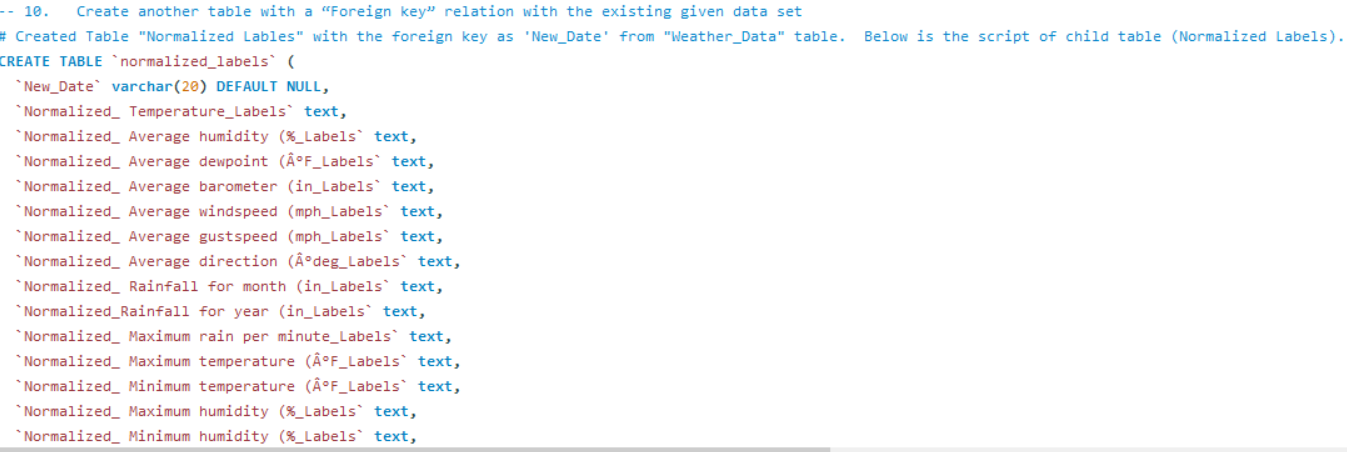


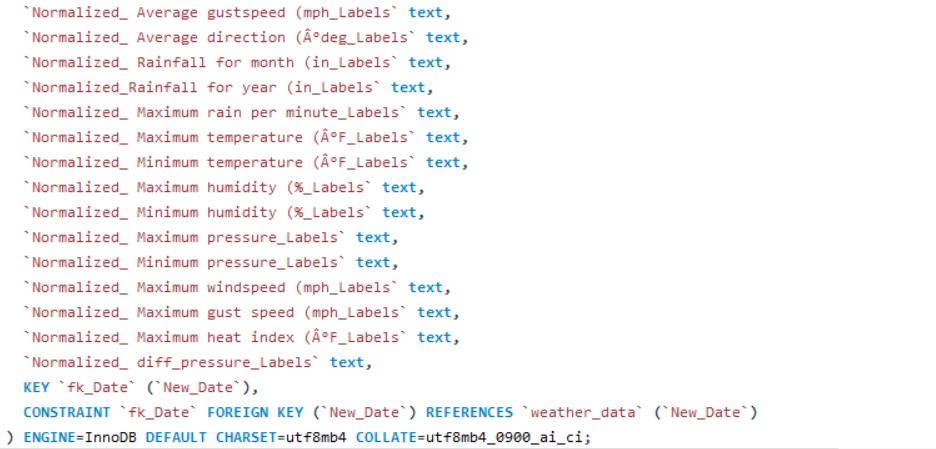

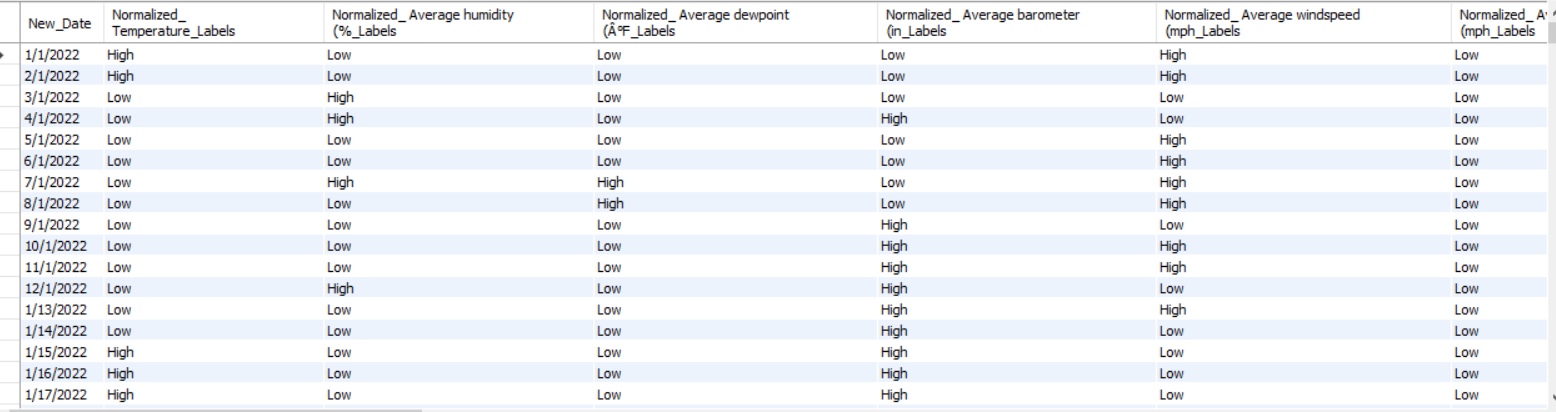